## Daten aus API einlesen
Diesdasananas

Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [20]:
# packages import
import requests
import json
import pandas as pd


Login to api

In [21]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [22]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,6078813a4568aa5ea53c9241.4fd6d90d9b5b5e019f8c8...


get devices data

In [23]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

# payload = json.dumps([
#   {
#     "data": [],
#     "count": 2,
#     "meta": {}
#   }
# ])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers)
#print(devices_response.text)


In [24]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,2203AF9,60476e95362d421c28ee0058,SimplePack POC_02203AF9 TeamA,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '607824844568aa5ea52ea8ba', 'keys': [...",[],[],"{'_id': '607824844568aa5ea52ea8ba', 'keys': [{...",NaN
1,1F2504E,60476e95362d421c28ee0058,Türe Beschleunigung (PTH-04E),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '60787abb8227aa5e8571b244', 'keys': [...",[],[],"{'_id': '60787abb8227aa5e8571b244', 'keys': [{...",NaN
2,2203AFA,60476e95362d421c28ee0058,Türe Magnet aussen (POC-AFA),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '60785a8f4568aa5ea53894ed', 'keys': [...",[],[],"{'_id': '60785a8f4568aa5ea53894ed', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AAB,60476e95362d421c28ee0058,Türe Magnet innen (POC-AAB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '60787d7c4568aa5ea53c3e22', 'keys': [...",[],[],"{'_id': '60787d7c4568aa5ea53c3e22', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."
4,1F25047,60476e95362d421c28ee0058,Türriegel Beschl. (PTH-047),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '60787da94568aa5ea53c4217', 'keys': [...",[],[],"{'_id': '60787da94568aa5ea53c4217', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
5,2203ACB,60476e95362d421c28ee0058,Türriegel Magnet (POC-ACB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '607877c68227aa5e85717ca2', 'keys': [...",[],[],"{'_id': '607877c68227aa5e85717ca2', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."


## Sensordaten einlesen

In [61]:
%%time
message_data_combined = pd.DataFrame()

for deviceid in device_data['id'].items():
  deviceid = deviceid[1]
  url = "https://www.iofrog.com/api/v2/devices/" + deviceid + "/messages?timestampFrom=1616601600&limit=5000"

  # payload = json.dumps({
  #   "data": [
  #     {
  #       "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
  #       "isAlarm": False,
  #       "isDismissed": False,
  #       "timestamp": 1584093653,
  #       "type": "data_uplink",
  #       "seqNumber": 1,
  #       "keys": [
  #         {
  #           "isCode": False,
  #           "_id": "1111111111111111111111",
  #           "key": "key",
  #           "value": "value",
  #           "keyLocale": "Klíč",
  #           "valueLocale": "Hodnota",
  #           "color": "alarm",
  #           "icon": "icon name (from fontAwesome)"
  #         }
  #       ]
  #     }
  #   ],
  #   "count": 1
  # })
  headers = {
    'Authorization': 'Bearer ' + access_token,
    'Content-Type': 'application/json',
    'Cookie': ''
  }
  message_response = requests.request("GET", url, headers=headers)
  # print(response.text)
  message_dict = json.loads(message_response.text)
  # json response to dataframe
  if 'code' in message_dict:
    print("Error reading sensor messages from device: " + deviceid)
    print(message_dict)
  else:
    message_data = pd.DataFrame.from_dict(message_dict['data'])
    message_data = message_data.drop(columns=['keys'])
    message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
    message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
    message_data_keys.reset_index(inplace=True)
    message_data_keys = message_data_keys.groupby('_id').sum()
    #print(message_data_keys)
    # join df's
    message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)
    message_data_combined = pd.concat([message_data_combined, message_data])

message_data_combined

Wall time: 6.56 s


,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
0,607824844568aa5ea52ea8ba,1618486404,data_bidir,140.0,2203AF9,2021-04-15T11:33:24.725Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6077e6ce4a4e60184af43e28,1618470605,data_bidir,139.0,2203AF9,2021-04-15T07:10:06.889Z,0,reed_counter,0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6077b3744a4e60184aef490f,1618457459,data_bidir,138.0,2203AF9,2021-04-15T03:31:00.938Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6077425702ab2e5243d3b407,1618428502,data_bidir,137.0,2203AF9,2021-04-14T19:28:23.964Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6077420d4a4e60184ae6dc96,1618428428,data_bidir,136.0,2203AF9,2021-04-14T19:27:09.487Z,0,heartbeat_2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,605b7844f4e46133dc9f0885,1616607298,data_bidir,153.0,2203ACB,2021-03-24T17:35:00.665Z,0,reed_counter,0,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,605b7262f4e46133dc9eae68,1616605778,data_bidir,152.0,2203ACB,2021-03-24T17:09:54.843Z,0,reed_counter,0,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,605b6b38f4e46133dc9e40bf,1616603959,data_bidir,151.0,2203ACB,2021-03-24T16:39:20.359Z,0,reed_counter,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,605b67ab7746444305bd79a8,1616603049,data_bidir,150.0,2203ACB,2021-03-24T16:24:11.052Z,0,reed_counter,0,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Datetime string zu Datetime Objekten konvertieren

In [62]:
message_data_combined["created"] = pd.to_datetime(message_data_combined["created"])
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
0,607824844568aa5ea52ea8ba,1618486404,data_bidir,140.0,2203AF9,2021-04-15 11:33:24.725000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6077e6ce4a4e60184af43e28,1618470605,data_bidir,139.0,2203AF9,2021-04-15 07:10:06.889000+00:00,0,reed_counter,0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6077b3744a4e60184aef490f,1618457459,data_bidir,138.0,2203AF9,2021-04-15 03:31:00.938000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6077425702ab2e5243d3b407,1618428502,data_bidir,137.0,2203AF9,2021-04-14 19:28:23.964000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6077420d4a4e60184ae6dc96,1618428428,data_bidir,136.0,2203AF9,2021-04-14 19:27:09.487000+00:00,0,heartbeat_2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,605b7844f4e46133dc9f0885,1616607298,data_bidir,153.0,2203ACB,2021-03-24 17:35:00.665000+00:00,0,reed_counter,0,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,605b7262f4e46133dc9eae68,1616605778,data_bidir,152.0,2203ACB,2021-03-24 17:09:54.843000+00:00,0,reed_counter,0,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,605b6b38f4e46133dc9e40bf,1616603959,data_bidir,151.0,2203ACB,2021-03-24 16:39:20.359000+00:00,0,reed_counter,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,605b67ab7746444305bd79a8,1616603049,data_bidir,150.0,2203ACB,2021-03-24 16:24:11.052000+00:00,0,reed_counter,0,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
message_data_combined['counter'] = pd.to_numeric(message_data_combined['counter'])

### Only use sensors in reed counter mode

In [67]:
message_data_rc = message_data_combined[message_data_combined['action'] == 'reed_counter']
message_data_rc

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
1,6077e6ce4a4e60184af43e28,1618470605,data_bidir,139.0,2203AF9,2021-04-15 07:10:06.889000+00:00,0,reed_counter,0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,60742c3a914447151b7754c6,1618226233,data_bidir,127.0,2203AF9,2021-04-12 11:17:14.604000+00:00,0,reed_counter,0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,60731167914447151b5d30dd,1618153830,data_bidir,122.0,2203AF9,2021-04-11 15:10:31.292000+00:00,0,reed_counter,0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,607007ca6d938d118aedd1fd,1617954762,data_bidir,112.0,2203AF9,2021-04-09 07:52:42.984000+00:00,0,reed_counter,0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,606f10586d938d118acdab07,1617891415,data_bidir,108.0,2203AF9,2021-04-08 14:16:56.592000+00:00,0,reed_counter,0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,605b7844f4e46133dc9f0885,1616607298,data_bidir,153.0,2203ACB,2021-03-24 17:35:00.665000+00:00,0,reed_counter,0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,605b7262f4e46133dc9eae68,1616605778,data_bidir,152.0,2203ACB,2021-03-24 17:09:54.843000+00:00,0,reed_counter,0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,605b6b38f4e46133dc9e40bf,1616603959,data_bidir,151.0,2203ACB,2021-03-24 16:39:20.359000+00:00,0,reed_counter,0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,605b67ab7746444305bd79a8,1616603049,data_bidir,150.0,2203ACB,2021-03-24 16:24:11.052000+00:00,0,reed_counter,0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Separate counter column for each sensor id

In [71]:

for deviceid in device_data['id'].items():
    message_data_rc[str(deviceid) + '_counter'] = message_data_rc.loc[message_data_rc['deviceId'] == deviceid]['counter']

message_data_rc.drop(columns='counter')

C:\Users\Pascal\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,firmware,...,y_min,z_fin,z_max,z_min,"(0, '2203AF9')_counter","(1, '1F2504E')_counter","(2, '2203AFA')_counter","(3, '2203AAB')_counter","(4, '1F25047')_counter","(5, '2203ACB')_counter"
1,6077e6ce4a4e60184af43e28,1.618471e+09,data_bidir,139.0,2203AF9,2021-04-15 07:10:06.889000+00:00,0.0,reed_counter,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,60742c3a914447151b7754c6,1.618226e+09,data_bidir,127.0,2203AF9,2021-04-12 11:17:14.604000+00:00,0.0,reed_counter,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,60731167914447151b5d30dd,1.618154e+09,data_bidir,122.0,2203AF9,2021-04-11 15:10:31.292000+00:00,0.0,reed_counter,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,607007ca6d938d118aedd1fd,1.617955e+09,data_bidir,112.0,2203AF9,2021-04-09 07:52:42.984000+00:00,0.0,reed_counter,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,606f10586d938d118acdab07,1.617891e+09,data_bidir,108.0,2203AF9,2021-04-08 14:16:56.592000+00:00,0.0,reed_counter,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(1, '1F2504E')_counter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, '2203AFA')_counter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, '2203AAB')_counter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(4, '1F25047')_counter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Pascal\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000026E390FEB50> has a label of '__v' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:xlabel='created'>

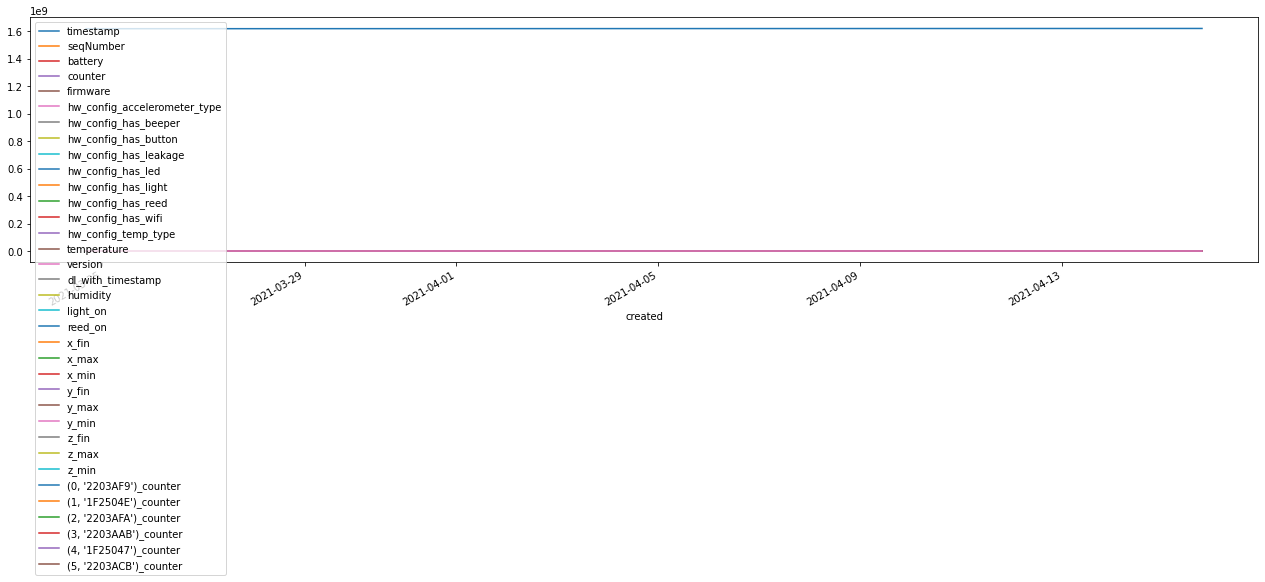

In [72]:
message_data_rc.plot(x="created", figsize = (22,5))


---
## Spielwiese

## google drive api (testing still)

In [32]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [33]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=491460359726-lj3ilu22ir8ckqnjefot5gs99vmig1d2.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [35]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')
    print(file1)

unsupported file
GoogleDriveFile({'kind': 'drive#file', 'id': '1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'etag': '"MTYxNjc3NDQ0MTgxNA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'alternateLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/edit?usp=drivesdk', 'embedLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/preview?ouid=115354251365952521942', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.document', 'thumbnailLink': 'https://docs.google.com/feeds/vt?gd=true&id=1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA&v=1&s=AMedNnoAAAAAYHidftG4pfhKFW_g9QPE95m4LrZ6glEu&sz=s220', 'title': 'Unbenanntes Dokument', 'mimeType': 'application/vnd.google-apps.document', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'creat

In [36]:
print(fileCons)

[b'{\n "error": {\n  "errors": [\n   {\n    "domain": "usageLimits",\n    "reason": "dailyLimitExceededUnreg",\n    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",\n    "extendedHelp": "https://code.google.com/apis/console"\n   }\n  ],\n  "code": 403,\n  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."\n }\n}\n']
